In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,18,1,33,1,0,2,1725.55230
1,28,1,33,3,0,2,4449.46200
2,33,1,22,0,0,1,21984.47061
3,32,1,28,0,0,1,3866.85520
4,31,0,25,0,0,2,3756.62160


In [ ]:
le_encoder = LabelEncoder()
data['sex'] = le_encoder.fit_transform(data['sex'])
data['smoker'] = le_encoder.fit_transform(data['smoker'])
data['region'] = le_encoder.fit_transform(data['region'])

In [ ]:
data['bmi'] = data['bmi'].astype('int64')

<Axes: >

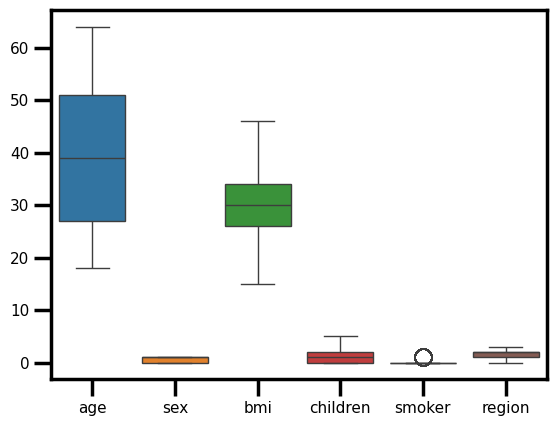

In [ ]:
sns.boxplot(data.iloc[:,:-1])

In [ ]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [ ]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,Y,test_size=0.1)

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr_score = lr_model.score(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)
print(lr_score)

0.7269683440531325


In [ ]:
def show_score(actual_value , prediction_value):
  MAE_score = mean_absolute_error(actual_value , prediction_value)
  MSE_score = np.sqrt(mean_squared_error(actual_value, prediction_value))
  R2_score =  r2_score(actual_value, prediction_value)
  sns.distplot(prediction_value, color="y", label="Prediction Value",hist=False)
  sns.distplot(actual_value,  color="g", label="Actual Value",hist=False)
  plt.legend()
  print(MAE_score,'\n',MSE_score,'\n',R2_score)

3920.0309599754214 
 6102.010742838621 
 0.7053628793080655


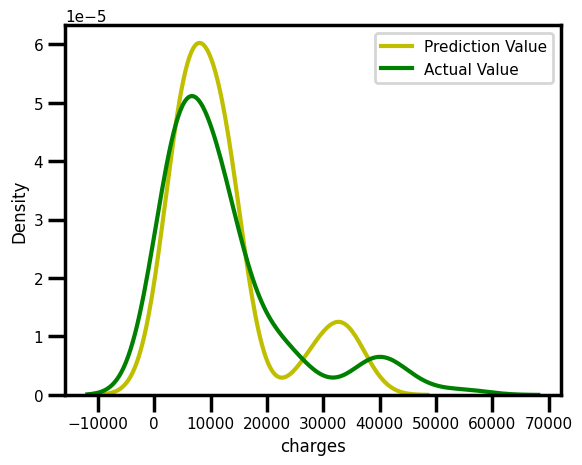

In [ ]:
show_score(prediction_value=y_pred_lr,actual_value=y_test)

In [ ]:
import pickle

In [ ]:
pickle.dump(lr_model,open('model.pkl','wb'))